In [1]:
import pandas as pd
import os

In [2]:
os.chdir('E:\\')

In [3]:
data=pd.read_csv('E:\\MS Office\\data.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2    INDUS   506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':' INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

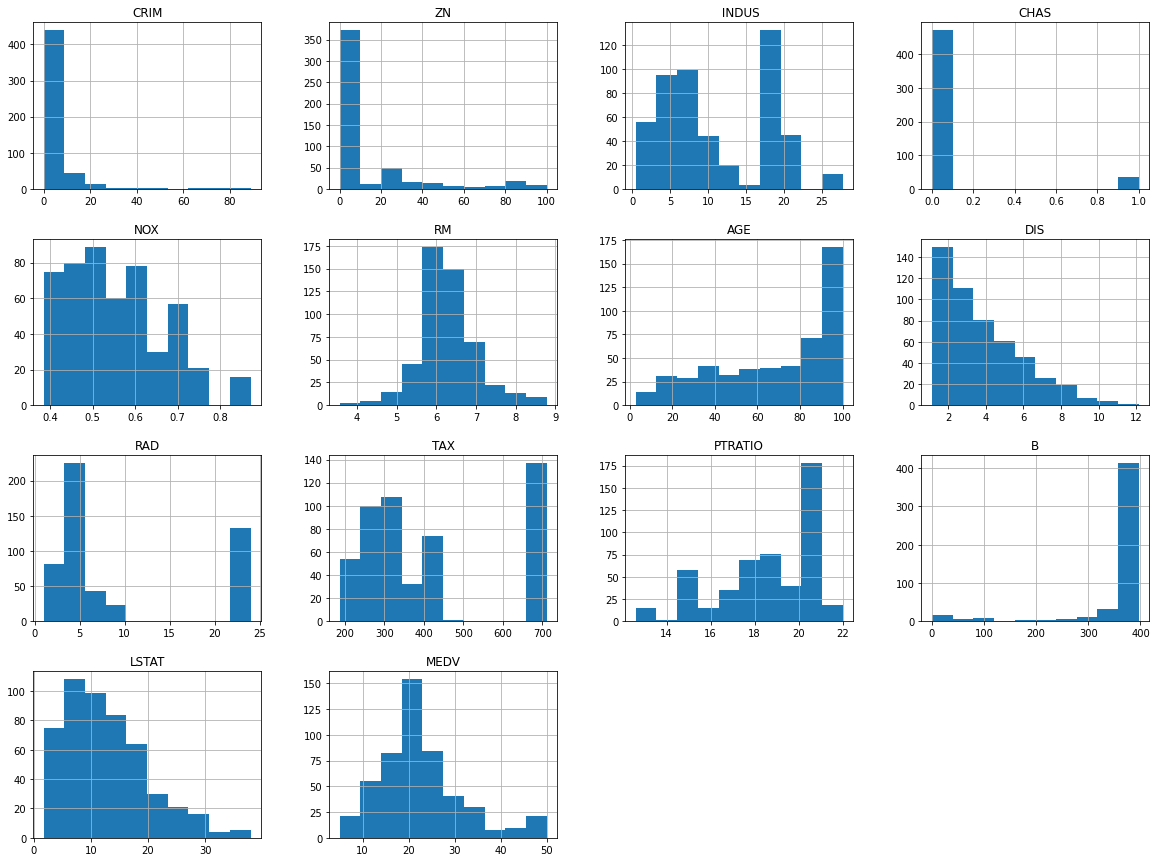

In [6]:
data.hist(figsize=(20,15))

In [7]:
import numpy as np
def split_data(data,test_ratio):
    np.random.seed(42)
    suffuled = np.random.permutation(len(data))
    test_data_size=int(len(data)*test_ratio)
    test_set=suffuled[:test_data_size]
    train_set=suffuled[test_data_size:]
    return data.iloc[test_set],data.iloc[train_set]

In [8]:
test_data,train_data=split_data(data,.2)

In [9]:
train_data.shape

(405, 14)

In [10]:
test_data.shape

(101, 14)

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=.2,random_state=42)
train_data.shape,test_data.shape

((405, 14), (101, 14))

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)
for train_index,test_index in split.split(data,data['CHAS']):
    start_train_set=data.loc[train_index]
    start_test_set=data.loc[test_index]

In [13]:
start_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
start_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
data=start_train_set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2    INDUS   404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [16]:
corr_matrix=data.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679616
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
 INDUS    -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

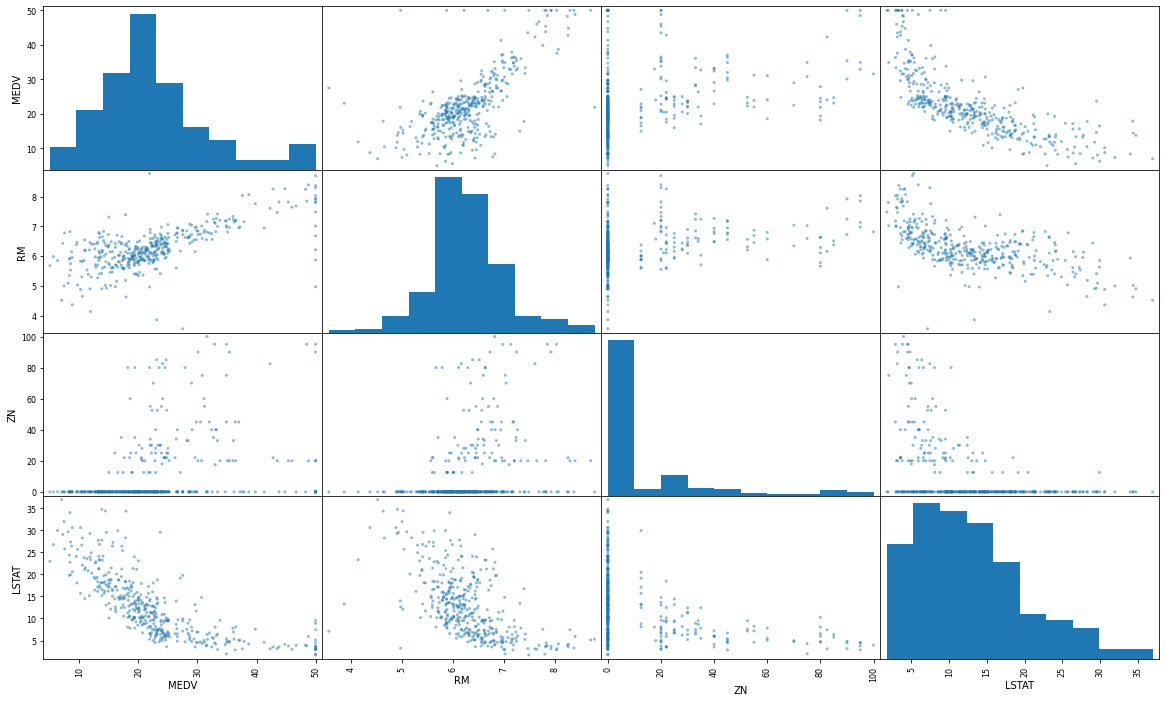

In [18]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(data[attributes],figsize=(20,12))

## We work on only start_train_set for data traing 

In [19]:
# from pandas.plotting import scatter_matrix
# attributes=['MEDV','RM','ZN','LSTAT']
# scatter_matrix(start_train_set[attributes],figsize=(20,12))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

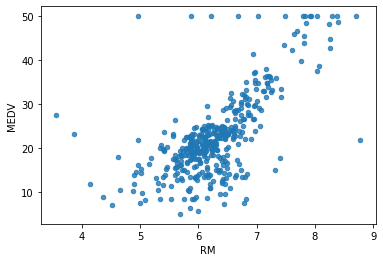

In [20]:
data.plot(kind="scatter",x="RM",y="MEDV",alpha=.8)

In [21]:
data["TAXRM"]=data["TAX"]/data["RM"]

In [22]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix=data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679616
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
 INDUS    -0.473516
PTRATIO   -0.493534
TAXRM     -0.530282
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

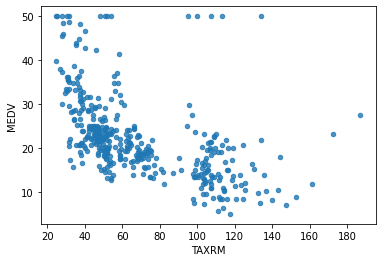

In [25]:
data.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=.8)

In [26]:
start_train_set_feature=data.drop("MEDV" , axis=1)
start_train_set_labels=data["MEDV"]

In [27]:
start_train_set_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

In [28]:
# start_train_set=start_train_set_feature

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2    INDUS   404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [30]:
a=data.dropna(subset=["RM"])
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     400 non-null    float64
 1   ZN       400 non-null    float64
 2    INDUS   400 non-null    float64
 3   CHAS     400 non-null    int64  
 4   NOX      400 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      400 non-null    float64
 7   DIS      400 non-null    float64
 8   RAD      400 non-null    int64  
 9   TAX      400 non-null    int64  
 10  PTRATIO  400 non-null    float64
 11  B        400 non-null    float64
 12  LSTAT    400 non-null    float64
 13  MEDV     400 non-null    float64
 14  TAXRM    400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.0 KB


In [31]:
a=data.drop("RM",axis=1)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2    INDUS   404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   AGE      404 non-null    float64
 6   DIS      404 non-null    float64
 7   RAD      404 non-null    int64  
 8   TAX      404 non-null    int64  
 9   PTRATIO  404 non-null    float64
 10  B        404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
 13  TAXRM    400 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [32]:
median=data["RM"].median()

In [33]:
a=data["RM"].fillna(median)

In [34]:
b=pd.DataFrame(a)
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      404 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [35]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282498,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.719932
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715626,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.514525
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.961287
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.030598
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.670322
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [36]:
from sklearn.impute import SimpleImputer
imputer_train_set=SimpleImputer(strategy="median")
imputer_train_set.fit(data)

SimpleImputer(strategy='median')

In [37]:
imputer_train_set.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21350000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.50305984e+01])

In [38]:
x=imputer_train_set.transform(data)

In [39]:
data_num=pd.DataFrame(x)

In [40]:
data_num.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281814,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.594295
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712099,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.382956
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.030598
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


## Imputer also for test_set data

In [41]:
start_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303881,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.666281,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.167000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
from sklearn.impute import SimpleImputer
imputer_tset_set=SimpleImputer(strategy="median")
imputer_tset_set.fit(start_test_set)

SimpleImputer(strategy='median')

In [43]:
imputer_tset_set.statistics_

array([1.76150e-01, 0.00000e+00, 7.76000e+00, 0.00000e+00, 5.15000e-01,
       6.16700e+00, 7.11000e+01, 3.42295e+00, 5.00000e+00, 3.07000e+02,
       1.91500e+01, 3.93740e+02, 1.05650e+01, 2.15000e+01])

In [44]:
y=imputer_tset_set.transform(start_test_set)

In [45]:
data_num_test=pd.DataFrame(y)

In [46]:
data_num_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.302539,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.663113,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.167000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [47]:
data_num.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281814,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.594295
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712099,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.382956
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.030598
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline =Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [49]:
pipeline=my_pipeline.fit(data_num)

In [50]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [51]:
pipeline=my_pipeline.fit_transform(data)

In [52]:
pipeline

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.86091034,
        -0.06501087, -0.51118359],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.94116739,
         0.21235476, -0.81016361],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81480158,
        -0.61974213,  1.12046888],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -1.27603303,
         2.27126115, -1.03050289],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.73869575,
        -0.89710776,  1.09987781],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.09940681,
         0.08433985, -0.66102712]])

In [53]:
pipeline.shape

(404, 15)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(pipeline ,start_train_set_labels)

RandomForestRegressor()

In [55]:
some_data=data.iloc[:5]

In [56]:
Some_labels=start_train_set_labels.iloc[:5]

In [57]:
prepared_data=my_pipeline.transform(some_data)

In [58]:
model.predict(prepared_data)

array([21.928, 24.492, 16.688, 23.098, 22.985])

In [59]:
list(Some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [60]:
from sklearn.metrics import mean_squared_error
data_prediction=model.predict(pipeline)
mse=mean_squared_error(start_train_set_labels ,data_prediction )
rmse=np.sqrt(mse)

In [61]:
rmse

0.07826535214598589

## for evaluation use crossalidation

In [62]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,pipeline,start_train_set_labels,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)

In [63]:
rmse_score

array([0.17621661, 0.29170383, 0.21571221, 0.16965963, 0.14927776,
       0.19661714, 0.16603832, 0.35814463, 0.08267481, 0.43534587])

## Check for all model for by the function find the value of model and compare

In [64]:
def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard devaiation",scores.std())

In [65]:
print_scores(rmse_score)

Scores [0.17621661 0.29170383 0.21571221 0.16965963 0.14927776 0.19661714
 0.16603832 0.35814463 0.08267481 0.43534587]
Mean 0.22413908076643646
Standard devaiation 0.10110187224151361


## Saving the model 

In [66]:
from joblib import dump,load
dump(model,'Real_state.joblib')

['Real_state.joblib']

## Testing the model on the test data

In [67]:
train_set=start_train_set.drop("MEDV",axis=1)
test_set=start_test_set["MEDV"].copy()
test_set_prepaired=my_pipeline.transform(tset_set)
final_prediction=model.predict(test_set_prepaired)
final_mse=mean_squared_error(start_test_set,final_prediction)
final_rmse=np.sqrt(final_mse)

NameError: name 'tset_set' is not defined

In [ ]:
final_rmse